In [34]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

INPUT_PATH = '../Datasets/Evaluations/Sentiment_Analysis_Zero_shot_3.5_instruct.csv'
OUTPUT_PATH = '../Datasets/Evaluations/Evaluation_Sentiment_Analysis.csv'
PROMPT_NAME = 'prompt_3_zeroshot_single_term'
MODEL = 'gpt-3.5-turbo'

df_data = pd.read_csv(INPUT_PATH)
df_data = df_data.rename(columns={'polarity': 'y_true'})
df_data = df_data.rename(columns={'polarity_pred': 'y_pred'})




In [35]:
df_data.head()

,Unnamed: 0,text_id,term_id,text,term,y_true,y_pred,prompt_name,prompt
0,0,0,0,The food was served promptly but the meal wasn...,food,neutral,positive,prompt_3_zeroshot_single_term,The food was served promptly but the meal wasn...
1,1,0,1,The food was served promptly but the meal wasn...,served,positive,positive,prompt_3_zeroshot_single_term,The food was served promptly but the meal wasn...
2,2,0,2,The food was served promptly but the meal wasn...,appetizers,positive,positive,prompt_3_zeroshot_single_term,The food was served promptly but the meal wasn...
3,3,1,3,"When I got home, there was a message on the ma...",owner,neutral,neutral,prompt_3_zeroshot_single_term,"When I got home, there was a message on the ma..."
4,4,1,4,"When I got home, there was a message on the ma...",waitress,negative,neutral,prompt_3_zeroshot_single_term,"When I got home, there was a message on the ma..."


In [36]:
def multiclass_eval(model, prompt, df):
    y_true = df['y_true']
    y_true = df['y_pred']
    cm = metrics.confusion_matrix(df['y_true'], df['y_pred'])
    cm
    plt.figure(figsize=(3,3))
    x_axis_labels = ['negative', 'neutral', 'positive']
    y_axis_labels = ['negative', 'neutral', 'positive']
    sns.heatmap(cm, annot=True, fmt="0.3f", linewidths=.5, square = True, cbar = 'False', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    # Display the plot
    plt.show()
    print(metrics.classification_report(df['y_true'], df['y_pred'], output_dict=False))
    classification_report = metrics.classification_report(df['y_true'], df['y_pred'], output_dict=True)
    df = pd.DataFrame(classification_report)
    return df

    

    
    
    
    

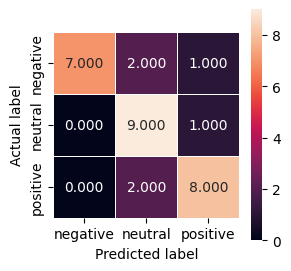

              precision    recall  f1-score   support

    negative       1.00      0.70      0.82        10
     neutral       0.69      0.90      0.78        10
    positive       0.80      0.80      0.80        10

    accuracy                           0.80        30
   macro avg       0.83      0.80      0.80        30
weighted avg       0.83      0.80      0.80        30



In [7]:
data = {'y_true' : ['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative'], 'y_pred' : ['positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral','neutral', 'positive', 'positive', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative']}
df = pd.DataFrame(data)
df
multiclass_eval('model', 'prompt', df)


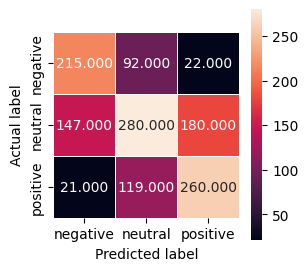

              precision    recall  f1-score   support

    negative       0.56      0.65      0.60       329
     neutral       0.57      0.46      0.51       607
    positive       0.56      0.65      0.60       400

    accuracy                           0.57      1336
   macro avg       0.56      0.59      0.57      1336
weighted avg       0.57      0.57      0.56      1336



In [37]:
df_eval = multiclass_eval(MODEL, PROMPT_NAME, df_data)

In [33]:
df_eval.head()

,negative,neutral,positive,accuracy,macro avg,weighted avg
precision,0.521158,0.491935,0.465269,0.486527,0.492787,0.491148
recall,0.711246,0.100494,0.887500,0.486527,0.566413,0.486527
f1-score,0.601542,0.166895,0.610490,0.486527,0.459642,0.406743
support,329.000000,607.000000,400.000000,0.486527,1336.000000,1336.000000


In [ ]:
df_eval.to_xml(OUTPUT_PATH, index=False)